<a href="https://colab.research.google.com/github/Mercymerine/Pandas-Analysis/blob/main/project_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
covid = pd.read_csv('/content/drive/MyDrive/Capstone_project2/covid_19_data.csv')
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


**DATA CLEANING**

In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [ ]:
covid.describe()

,SNo,Confirmed,Deaths,Recovered
count,306429.000000,3.064290e+05,306429.000000,3.064290e+05
mean,153215.000000,8.567091e+04,2036.403268,5.042029e+04
std,88458.577156,2.775516e+05,6410.938048,2.015124e+05
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05
25%,76608.000000,1.042000e+03,13.000000,1.100000e+01
50%,153215.000000,1.037500e+04,192.000000,1.751000e+03
75%,229822.000000,5.075200e+04,1322.000000,2.027000e+04
max,306429.000000,5.863138e+06,112385.000000,6.399531e+06


In [ ]:
covid['Province/State'].fillna('N/A', inplace =True)

In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   306429 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [ ]:
covid['ObservationDate'] = pd.to_datetime(covid['ObservationDate'])

In [ ]:

from dateutil import parser

def parse_date(date_str):
    try:
        return parser.parse(date_str)
    except ValueError:
        return pd.NaT

covid['Last Update'] = covid['Last Update'].apply(parse_date)

print(covid)
print(covid.dtypes)

           SNo ObservationDate     Province/State  Country/Region  \
0            1      2020-01-22              Anhui  Mainland China   
1            2      2020-01-22            Beijing  Mainland China   
2            3      2020-01-22          Chongqing  Mainland China   
3            4      2020-01-22             Fujian  Mainland China   
4            5      2020-01-22              Gansu  Mainland China   
...        ...             ...                ...             ...   
306424  306425      2021-05-29  Zaporizhia Oblast         Ukraine   
306425  306426      2021-05-29            Zeeland     Netherlands   
306426  306427      2021-05-29           Zhejiang  Mainland China   
306427  306428      2021-05-29    Zhytomyr Oblast         Ukraine   
306428  306429      2021-05-29       Zuid-Holland     Netherlands   

               Last Update  Confirmed  Deaths  Recovered  
0      2020-01-22 17:00:00        1.0     0.0        0.0  
1      2020-01-22 17:00:00       14.0     0.0        

In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   SNo              306429 non-null  int64         
 1   ObservationDate  306429 non-null  datetime64[ns]
 2   Province/State   306429 non-null  object        
 3   Country/Region   306429 non-null  object        
 4   Last Update      306429 non-null  datetime64[ns]
 5   Confirmed        306429 non-null  float64       
 6   Deaths           306429 non-null  float64       
 7   Recovered        306429 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 18.7+ MB


In [ ]:
covid.describe()

,SNo,ObservationDate,Last Update,Confirmed,Deaths,Recovered
count,306429.000000,306429,306429,3.064290e+05,306429.000000,3.064290e+05
mean,153215.000000,2020-11-06 01:54:54.146441728,2021-03-11 01:14:17.227314944,8.567091e+04,2036.403268,5.042029e+04
min,1.000000,2020-01-22 00:00:00,2020-01-22 17:00:00,-3.028440e+05,-178.000000,-8.544050e+05
25%,76608.000000,2020-07-30 00:00:00,2021-04-02 15:13:53,1.042000e+03,13.000000,1.100000e+01
50%,153215.000000,2020-11-10 00:00:00,2021-04-02 15:13:53,1.037500e+04,192.000000,1.751000e+03
75%,229822.000000,2021-02-18 00:00:00,2021-04-02 15:13:53,5.075200e+04,1322.000000,2.027000e+04
max,306429.000000,2021-05-29 00:00:00,2021-05-30 04:20:55,5.863138e+06,112385.000000,6.399531e+06
std,88458.577156,NaN,NaN,2.775516e+05,6410.938048,2.015124e+05


In [ ]:
#covid.to_csv('covid.csv', index=False)

**DATA VISUALIZATION**

LINE GRAPH TO SHOW THE TREND OF COVID-19

In [ ]:
daily_cases = covid.groupby('ObservationDate')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
daily_cases

,ObservationDate,Confirmed,Deaths,Recovered
0,2020-01-22,557.0,17.0,30.0
1,2020-01-23,1097.0,34.0,60.0
2,2020-01-24,941.0,26.0,39.0
3,2020-01-25,1437.0,42.0,42.0
4,2020-01-26,2118.0,56.0,56.0
...,...,...,...,...
489,2021-05-25,167848207.0,3485788.0,104824935.0
490,2021-05-26,168416423.0,3498544.0,105380748.0
491,2021-05-27,168970791.0,3511297.0,106078106.0
492,2021-05-28,169470725.0,3523117.0,106633069.0


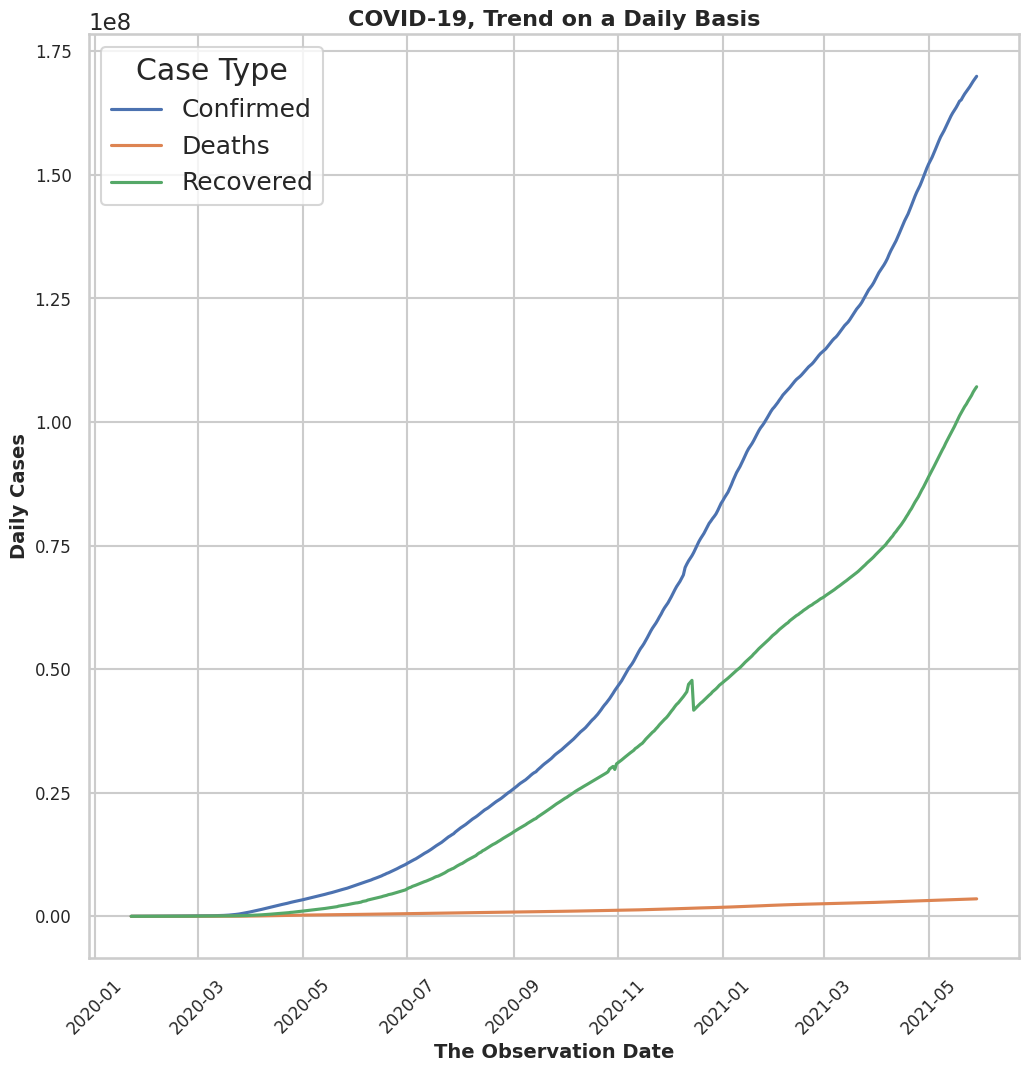

In [ ]:
plt.figure(figsize=(12, 12))
sns.set(style='whitegrid', context='talk')
sns.lineplot(daily_cases, x='ObservationDate', y ='Confirmed', label='Confirmed')
sns.lineplot(daily_cases, x='ObservationDate', y ='Deaths', label='Deaths')
sns.lineplot(daily_cases, x='ObservationDate', y ='Recovered', label='Recovered')
plt.legend(title = 'Case Type', loc='upper left', fontsize='medium', title_fontsize='large')
plt.ylabel('Daily Cases', fontsize=14, fontweight='bold')
plt.yticks(fontsize = 12)
plt.xlabel('The Observation Date', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.title('COVID-19, Trend on a Daily Basis', fontweight='bold', fontsize=16)
plt.show()

BAR PLOT TO SHOW THE TOP TEN COUNTRIES THAT WERE MOSTLY AFFECTED BY COVID

**MAPPING THE SPREAD OF COVID-19 WORLDWIDE**

In [ ]:
import geopandas as gdp

In [ ]:
world = gdp.read_file(gdp.datasets.get_path('naturalearth_lowres'))
world.head()

<ipython-input-28-c228ac64a514>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gdp.read_file(gdp.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
world = world.merge(covid, how='left', left_on='name', right_on='Country/Region')
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",7103.0,2020-03-19,N/A,Fiji,2020-03-19 14:53:06,1.0,0.0,0.0
1,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",7402.0,2020-03-20,N/A,Fiji,2020-03-19 14:53:06,1.0,0.0,0.0
2,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",7710.0,2020-03-21,N/A,Fiji,2020-03-19 14:53:06,1.0,0.0,0.0
3,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",7788.0,2020-03-22,N/A,Fiji,2020-03-08 05:31:00,2.0,0.0,0.0
4,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",8092.0,2020-03-23,N/A,Fiji,2020-03-23 23:23:20,3.0,0.0,0.0


In [ ]:
world.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry',
       'SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [ ]:
dropping=['pop_est','iso_a3', 'gdp_md_est','Province/State','Deaths', 'Recovered']
world.drop(columns=dropping, inplace=True)